In [11]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import copy

In [12]:
img = cv.imread('media/img2.jpg')
img_to_hide = cv.imread('media/test.jpg')

In [13]:
def hide_image(img_off, img_hid):
    bufor = copy.deepcopy(img_off)
    for height in range(len(img_hid)):
        for width in range(len(img_hid[1])):
            for channel in range(3):
                hidden_byte = img_hid[height][width][channel] 
                original_byte = bufor[height][width][channel] 
                
                bufor[height][width][channel] = original_byte & 0xf0 | hidden_byte >> 4
    return(bufor)

def decypher_photo(img_dec):
    bufor = copy.deepcopy(img_dec)
    for height in range(len(bufor)):
        for width in range(len(bufor[1])):
            for channel in range(3):
                original_byte = bufor[height][width][channel]                
                bufor[height][width][channel] = (original_byte << 4) & 0xff
    return(bufor)  

In [14]:
enriched = hide_image(img, img_to_hide)
decyphered = decypher_photo(enriched)

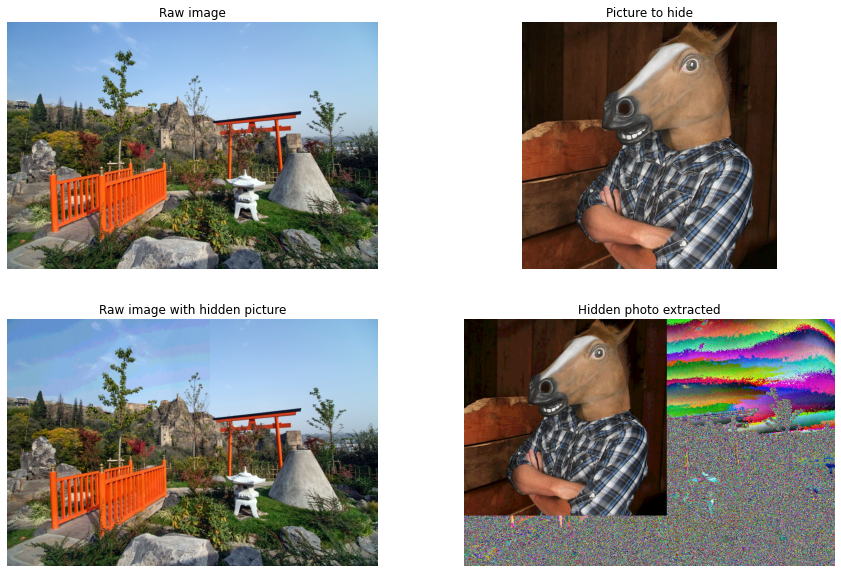

In [15]:
fig = plt.figure(figsize=(15, 10))
fig.add_subplot(2, 2, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Raw image")
fig.add_subplot(2, 2, 2)
plt.imshow(cv.cvtColor(img_to_hide, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Picture to hide")
fig.add_subplot(2, 2, 3)
plt.imshow(cv.cvtColor(enriched, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Raw image with hidden picture")
fig.add_subplot(2, 2, 4)
plt.imshow(cv.cvtColor(decyphered, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Hidden photo extracted")
plt.show()